## Goal

ToDo

In [2]:
from fastai.tabular.all import *
#from sklearn.datasets import load_wine

In [4]:
df = pd.read_csv('../public_data/train.csv')
test = pd.read_csv('../public_data/test.csv')

In [25]:
# import data
databunch = load_wine(as_frame=True)

In [37]:
cont_cols = databunch.data.columns
print (cont_cols)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [35]:
df = databunch.data.copy()
df['target'] = databunch.target.copy()

In [28]:
print (df.shape)
print (df.target.unique())
df.head()

(178, 14)
[0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [38]:
#path = untar_data(URLs.ADULT_SAMPLE)
#df = pd.read_csv(path/'adult.csv')
dep_var = 'target'
cat_names = []
cont_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [87]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cont_names = cont_names,
                   y_names='target',
                   y_block=CategoryBlock,
                   splits=splits)

In [88]:
dls = to.dataloaders(bs=64)
learn = tabular_learner(dls,metrics=accuracy)

In [89]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.112395,1.082805,0.228571,00:00


In [90]:
learn.show_results()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_pred
0,0.920748,-0.783339,1.215410,0.873792,0.084626,1.150845,1.199055,-0.609099,1.332025,0.272068,1.049664,0.056982,1.719265,0.0,2.0
1,-1.220275,-0.774204,0.147958,0.725463,-0.935162,-1.397202,-0.785377,1.151366,0.020784,-0.608719,0.425799,-0.028193,-0.930170,1.0,2.0
2,-0.910879,2.157999,0.605437,0.428805,-0.731205,-1.512275,-1.559306,1.402860,-1.430323,-0.503864,-0.911053,-1.987219,-0.073467,2.0,1.0
3,-0.155952,-0.920358,-0.233275,-0.461167,1.512330,-1.298568,-0.785377,-1.279752,-1.185558,-0.399008,-0.866491,-1.958827,-0.359035,2.0,2.0
4,-1.170772,1.774347,-0.004535,0.725463,-1.343078,-0.328666,-0.289269,0.480712,-0.468746,-1.028142,-0.732806,-0.141760,-0.517683,1.0,2.0
5,-2.420734,-0.774204,-0.690754,0.577134,-1.003148,0.263138,0.127462,1.319029,0.685146,-1.321738,3.366874,0.284116,-1.066608,1.0,1.0
6,0.376211,-0.354013,1.139163,-0.817157,0.152612,1.150845,1.179211,-0.441435,0.073233,0.397894,0.514923,0.241528,1.671671,0.0,2.0
7,-0.428220,-0.911223,-1.376973,-0.817157,0.016640,-0.460178,-0.626623,1.402860,-1.745020,0.293039,0.113867,-1.532952,-0.930170,1.0,2.0
8,0.103941,-0.783339,-1.071987,-1.202811,-0.119332,0.164504,0.593803,-0.692930,-0.433780,-0.566777,1.005101,0.028591,0.878426,0.0,2.0


SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.00363078061491251)

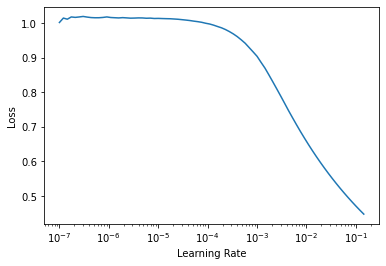

In [91]:
learn.lr_find()

In [68]:
lr_rate = 0.00363
lr_rate = 0.00048

In [69]:
learn.fit_one_cycle(15, max_lr=slice(lr_rate))

epoch,train_loss,valid_loss,accuracy,time
0,1.098240,1.116150,0.257143,00:00
1,1.080867,1.075969,0.600000,00:00
2,1.039581,0.995226,0.857143,00:00
3,0.980927,0.880419,0.885714,00:00
4,0.909201,0.753343,0.914286,00:00
5,0.835282,0.631162,0.914286,00:00
6,0.765786,0.521622,0.971429,00:00
7,0.702163,0.431330,0.971429,00:00
8,0.645371,0.361971,0.971429,00:00
9,0.594643,0.308485,0.971429,00:00


## Conclusions

With no fine-tuning and just using the default approach from fast.ai, we could arrive at 97.1% accuracy on the validation set.
Hence, we naively take this as a the state-of-the art value. We are nevertheless aware that hypertuning and other techniques might yield better accuracy, but since the upper limit lies within 3%, we assume that our results are good enough.